# Análise exploratórioa, Limpeza e  Tratamento de dados

## Análise exploratória

In [3]:
#primeiro bloco já importa as bibliotecas que serão necessárias
import pandas as pd
import seaborn as srn #visualização em gráficos
import statistics as sts #análise estatísticas

- Na importação do arquivo a ser analisado, o jupyter notebook irá buscar em seu diretório. Caso não lembre onde que o Jupyter está buscando fazer:
> pwd > Run

### Dados brutos

In [4]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()

X0   X1  X2        X3  X4  X4.1        X6  X7  X8  X9         X10  X11
0   1  619  RS  Feminino  42     2         0   1   1   1  10134888.0    1
1   2  608  SC  Feminino  41     1   8380786   1   0   1  11254258.0    0
2   3  502  RS  Feminino  42     8   1596608   3   1   0  11393157.0    1
3   4  699  RS  Feminino  39     1         0   2   0   0   9382663.0    0
4   5  850  SC  Feminino  43     2  12551082   1   1   1    790841.0    0

- Conforme visto acima, o arquivo possui dados que não estão completamente formatados (limpinhos). Deste modo, será preciso ajustar algumas coisas. Abaixo. 

In [5]:
dataset.shape #verifica formato dos dados. Uma matriz de 999 linhas e 12 colunas.

(999, 12)

### Nomeando colunas

In [6]:
#nomear colunas
dataset.columns = ['Id', 'Score', 'Estado','Genero','Idade','Patrimônio','Saldo', 'Produtos', 'TemCartCretido','Ativo','Salário','Saiu']

- Com a linha de código acima, foi possível nomear as colunas
- A linha de código abaixo é a informação já alterada

In [7]:
dataset.head()

Id  Score Estado    Genero  Idade  Patrimônio     Saldo  Produtos  \
0   1    619     RS  Feminino     42           2         0         1   
1   2    608     SC  Feminino     41           1   8380786         1   
2   3    502     RS  Feminino     42           8   1596608         3   
3   4    699     RS  Feminino     39           1         0         2   
4   5    850     SC  Feminino     43           2  12551082         1   

   TemCartCretido  Ativo     Salário  Saiu  
0               1      1  10134888.0     1  
1               0      1  11254258.0     0  
2               1      0  11393157.0     1  
3               0      0   9382663.0     0  
4               1      1    790841.0     0

### Passo a passo de análise

**Passo a passo da análise**
- 1ºpasso: Analise exploratória. Objetivo. Conhecer os dados. Compreender os dados. Detectar eventuais problemas.
> Eventuais problemas: Domínio dos dados (idade superior a 120 anos, locais em que a empresa não atende), valores faltantes (diferente de zero). <br>
> Eventuais soluções: Para valores faltantes | Se valores numéricos, substituir os valores faltantes pela média. Se valores categóricos, pela moda

### Análise de categóricos

In [8]:
#Explorar dados categóricos
agrupado = dataset.groupby (['Estado']).size() 
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

- A linha de código acima vai agrupar os Estados constantes nos dados, mostrando de forma resumida quantos Estados existem nos dados, e quantas vezes eles aparecem nos dados

**Problemas visualizados:**
- Estados que não existem: RP e TD
- Estados fora do domínio (domínio: estados apenas da Região Sul do Brasil): SP

**Para substituir os dados**:
- Usar a regra da moda: O estado que mais aparece é o RS.


<AxesSubplot:xlabel='Estado'>

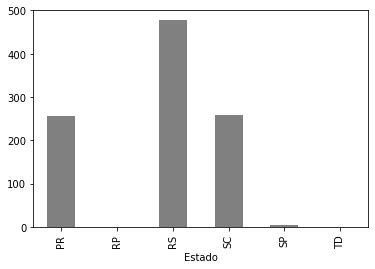

In [9]:
#Visualizar dados em gráfico em forma de barra
agrupado.plot.bar(color = 'gray')

In [10]:
#Gênero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

**Problemas encontrados**

- F e Fem Feminino | M Masculino: Representa o mesmo valor, mas estão escritas de forma diferente. Precisa unificar essas duas info. 

<AxesSubplot:xlabel='Genero'>

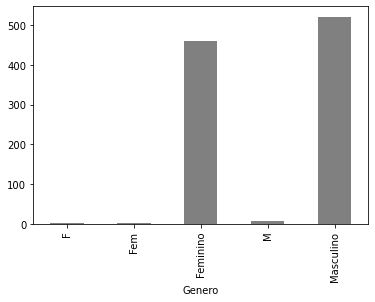

In [11]:
agrupado.plot.bar(color = 'gray')

### Análise de numéricos

In [12]:
#explorar colunas numéricas
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

**Análise de a partir dos dados da linha de código acima**
- Média e mediana (onde tem os 50%) estão próximas, o que indica que há uma distribuição não muito desuniforme dos dados referente ao score.
- Gráficos podem confirmar essa análise

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

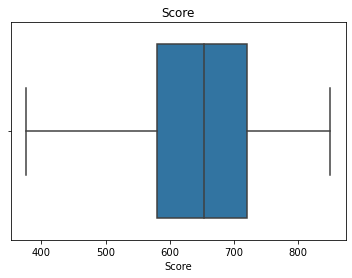

In [13]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

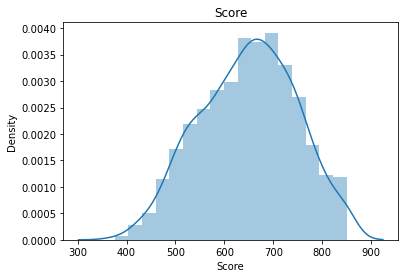

In [14]:
#visualizar histograma
srn.distplot(dataset['Score']).set_title('Score')

In [15]:
#análise descritiva da idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

**Analisando descritiva a partir da coluna IDADE**
- 'min' mostra valor negativo. Idade negativa não existe.
- 'max' mostra valor acima de 110. Ninguém vive 140 anos. 
- 'mean' (média) e 50% (mediana) estão próximas. Demonstrando que os dados aparentemente estão equilibrados.
- A partir dos pontos acima, verificar em outras formas de análises (gráficos) se os valores negativos e muito acima são casos pontuais  

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

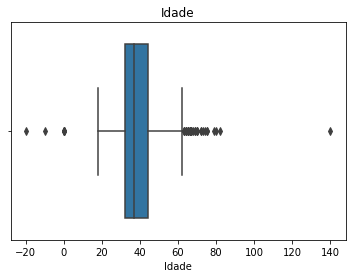

In [16]:
srn.boxplot(dataset['Idade']).set_title('Idade')


C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

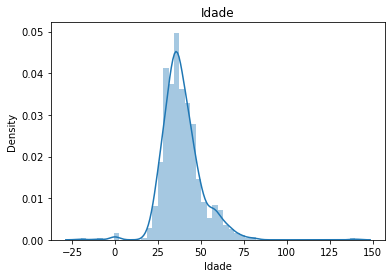

In [17]:
#histograma
srn.distplot(dataset['Idade']).set_title('Idade')

In [18]:
#descritivo Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

**Leitura dos dados acima**
- Existe saldo zero
- O 1º quartil é zero também.Indicando que a concentração dos saltos está a partir do 2º quartil. 
- Visualizaremos melhor no gráfico

In [38]:
srn.boxplot(x= dataset['Saldo']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

Text(0.5, 1.0, 'Saldo')

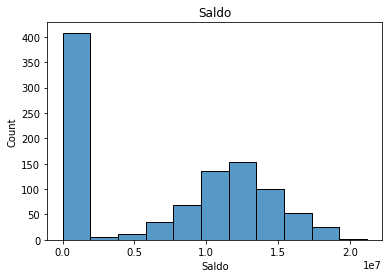

In [39]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

**Análise a partir dos gráficos**
- Muitas pessoas possui saldo zero. Não pode eliminar esse zero porque trata-se de uma coluna importante de visualizá-lo e verificar possíveis abandonos de clientes (dado bancário).

In [21]:
#descritivo salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

**Leitura dados acima**
- Média e mediana não estão tão próximas

In [40]:
srn.boxplot(x= dataset['Salário']).set_title('Salário')

Text(0.5, 1.0, 'Salário')

**Leitura dados acima**
- Grande concentração dos dados em zero. Deformando o boxbplot. 
- Se os valores outlines forem considerados erros, pode-se remover eles a atribuir a mediana em seu lugar. 
- Conforme gráfico abaixo, muitos salários igual a zero pode indicar que os **clientes não informaram o salário**.

In [45]:
#srn.histplot(dataset['Salário']). set_title('Salário') novo jeito
srn.distplot(dataset['Salário']). set_title('Salário')


C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salário')

In [24]:
#Resumo dos valores nulos 
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCretido    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

## Resolvendo problemas

### Coluna Salário

- Para os valores nulos constantes na coluna salário, basta substituir pelo valor da mediana do conjunto de dados referente à essa coluna.

In [50]:
#mediana do salário
mediana = sts.median(dataset['Salário'])
#mediana = dataset.median() #método .median() de objetos do tipo DataFrame do próprio Pandas.
mediana


8633363.0

In [26]:
#substituição dos valores nulos 'NAN' por mediana. 
dataset['Salário'].fillna(mediana, inplace=True) 
#inplace=true significa que está substituíndo no conj. de dados

In [27]:
#verificando se ainda há valores nulos na coluna salário
dataset['Salário'].isnull().sum()

0

### Gênero

- Problema: Valores núlos e valores com descrição diferente mas que possui mesmo significado (F, Fem, Feminino)
- Solução: Preencher os valores nulos por masculino. Pois esse valor **representa a moda**.

In [28]:
#resumindo valores nulos de uma catagoria específica
dataset['Genero'].isnull().sum()

8

In [29]:
#Substituição dos valores nulos
dataset['Genero'].fillna('Masculino', inplace=True)
dataset['Genero'].isnull().sum()

0

In [30]:
#padronização masc e fem
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F', 'Fem', 'Femino']),'Genero'] = 'Feminino'
#visualizando modificação
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

### Idade

- Problema: Idades fora do domínio (Menores do que zero, e maiores do que 120).
- Solução: Substituir pela mediana.

**Porque mediana e não média?** <br>
Porque a mediana é menos susceptível à outlines.

In [31]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [32]:
#visualizar registros fora do domínio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

Id  Score Estado     Genero  Idade  Patrimônio     Saldo  Produtos  \
867  869    636     RS   Feminino    -10           1  17083346         1   
984  986    773     RS  Masculino    -20           1  12453278         2   
990  992    655     RS  Masculino    140           5     93147         2   

     TemCartCretido  Ativo     Salário  Saiu  
867               1      0  11051028.0     1  
984               0      1   1172357.0     0  
990               1      0   6621413.0     0

In [33]:
#mediana idades
mediana = sts.median(dataset['Idade'])
mediana

37

In [34]:
#Substituição dos valores idade
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

In [36]:
#Verificando se linha anterior foi executada conforme

dataset.loc[(dataset['Idade']) < 0 | (dataset['Idade'] > 120)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimônio, Saldo, Produtos, TemCartCretido, Ativo, Salário, Saiu]
Index: []

### Dados duplicados

In [37]:
#Verificando ID Duplicado
dataset[dataset.duplicated(['Id'],keep=False)]

Id  Score Estado     Genero  Idade  Patrimônio     Saldo  Produtos  \
36   37    490     SC  Masculino     31           3  14526023         1   
80   81    665     RS   Feminino     34           1   9664554         2   
81   81    665     RS   Feminino     34           1   9664554         2   
867  37     37     37         37     37          37        37        37   
984  37     37     37         37     37          37        37        37   
990  37     37     37         37     37          37        37        37   

     TemCartCretido  Ativo     Salário  Saiu  
36                0      1  11406677.0     0  
80                0      0  17141366.0     0  
81                0      0  17141366.0     0  
867              37     37        37.0    37  
984              37     37        37.0    37  
990              37     37        37.0    37

In [51]:
#Excluindo duplicados
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
#verificando duplicados
dataset[dataset.duplicated(['Id'],keep=False)]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimônio, Saldo, Produtos, TemCartCretido, Ativo, Salário, Saiu]
Index: []

### Estados fora do Domínio

In [54]:
#Verificando estados
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [57]:
#Substituindo os Estados fora de Domínio pela moda do Estados
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']),'Estado']= 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

### Ouslies Salário

In [59]:
#verificando desvio padrão de 2 formas para escolher o que mais se adequa
desv = sts.stdev(dataset['Salário'])
desv

529784177.6096346

In [60]:
#verificando se existem salários 2 vezes maior que o desvio padrão (outliers)
dataset.loc[dataset['Salário'] >= 2 * desv] #filtro
#Em havendo, subsitui-los pela mediana

Id  Score Estado     Genero  Idade  Patrimônio     Saldo  Produtos  \
7      8    376     PR   Feminino     29           4  11504674         4   
116  118    668     PR   Feminino     37           6   1678644         1   
170  172    484     RS   Feminino     29           4  13011439         1   
230  232    673     RS  Masculino     72           1         0         2   

     TemCartCretido  Ativo       Salário  Saiu  
7                 1      0  1.193469e+10     1  
116               1      0  1.156383e+10     0  
170               1      0  1.640179e+09     0  
230               0      1  1.119812e+09     0

In [61]:
#calculando medianado salário
mediana = sts.median(dataset['Salário'])
mediana

8641028.0

In [62]:
#atribuindo os outlies à mediana
dataset.loc[dataset['Salário'] >= 2 * desv, 'Salário'] = mediana
#verificando se deu certo
dataset.loc[dataset['Salário'] >= 2 * desv]

Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimônio, Saldo, Produtos, TemCartCretido, Ativo, Salário, Saiu]
Index: []

## Visualização Final depois do tratamento

In [63]:
dataset.head()

Id  Score Estado    Genero  Idade  Patrimônio     Saldo  Produtos  \
0   1    619     RS  Feminino     42           2         0         1   
1   2    608     SC  Feminino     41           1   8380786         1   
2   3    502     RS  Feminino     42           8   1596608         3   
3   4    699     RS  Feminino     39           1         0         2   
4   5    850     SC  Feminino     43           2  12551082         1   

   TemCartCretido  Ativo     Salário  Saiu  
0               1      1  10134888.0     1  
1               0      1  11254258.0     0  
2               1      0  11393157.0     1  
3               0      0   9382663.0     0  
4               1      1    790841.0     0

In [65]:
dataset.shape

(995, 12)

> Como excluímos os registros duplicados, já não há mais 999 linhas. 